<a href="https://colab.research.google.com/github/LidianoJesus/Basic-Projects/blob/master/001_Case_People_Analytics_Prever_Sal%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Regressão Linear Simples**
## **Case: People Analytics**

Nesse caso foi usado os dados 'Dados_Salario.csv'

In [ ]:
 # Biblioteca para modelagem de dados
import pandas as pd

# Biblioteca para recursos matemáticos
import numpy as np

# Bibliotecas de plotagem de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carregamento dos Dados e EDA

In [ ]:
# Lendo a Base de Dados
Base_Dados = pd.read_csv('Dados_Salario.csv')

In [ ]:
# Verificando 
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tempo_Experiencia  30 non-null     float64
 1   Salario            30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Verificando 
print('Quantidade de linha:', Base_Dados.shape[0] )
print('Quantidade de colunas:', Base_Dados.shape[1] )

Quantidade de linha: 30
Quantidade de colunas: 2


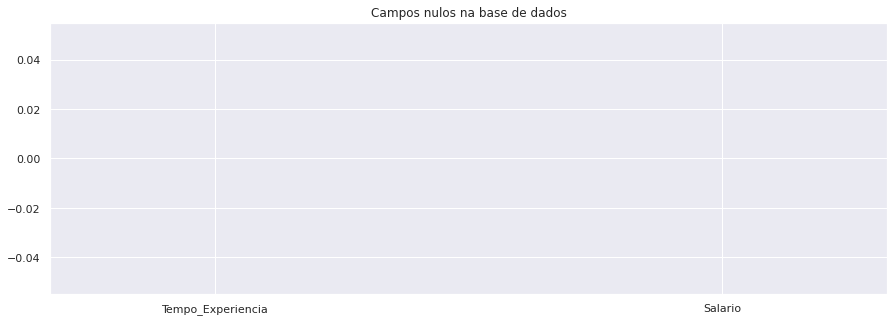

In [ ]:
# Verificando campos nulos

# Calcular os campos nulos
Analise = Base_Dados.isnull().sum()

# Plotagem do gráfico
plt.figure( figsize=(15,5) )
plt.bar( Analise.index, Analise, width=0.5, color='red' )
plt.title('Campos nulos na base de dados');

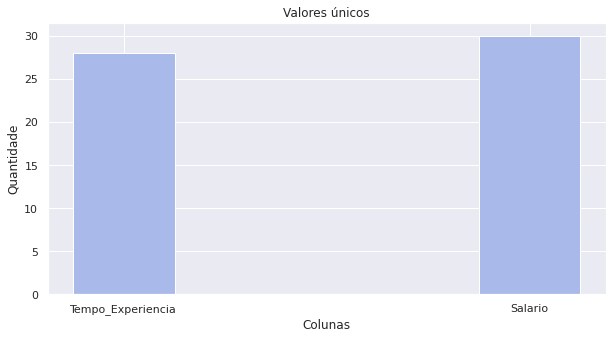

In [ ]:
# Verificando campos nulos

# Calcular os campos nulos
Analise = Base_Dados.nunique()

# Plotagem do gráfico
plt.figure( figsize=(10,5) )
plt.bar( Analise.index, Analise, width=0.25, color='#a9b9e9' )
plt.title('Valores únicos')
plt.xlabel('Colunas')
plt.ylabel('Quantidade');

In [ ]:
# Estatistica Descritiva
Base_Dados.describe()

,Tempo_Experiencia,Salario
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# plotar os valores usando o Plotly
Grafico=px.scatter( Base_Dados, # Base
                x='Tempo_Experiencia', #Coluna x
                y='Salario', # Coluna y
                title='Salario com tempo de experiência') # Titulo
Grafico.show()

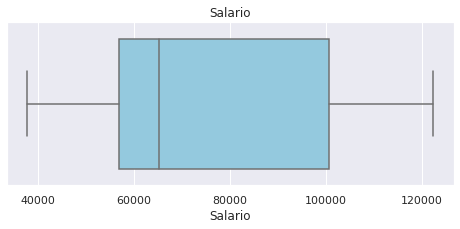

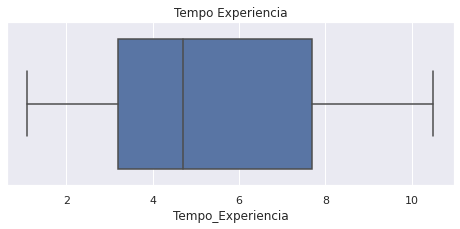

In [ ]:
# Plotagem do gráfico

# Modo Dark do Seaborn
sns.set(style='darkgrid')
# Setando paleta de cores
sns.color_palette('husl', 2)

# Plotagem do Salario
plt.figure( figsize=(8,3) )
plt.title('Salario')
sns.boxplot( data=Base_Dados, x='Salario', color='skyblue');

# Plotagem da Experiencia
plt.figure( figsize=(8,3) )
plt.title('Tempo Experiencia')
sns.boxplot( data=Base_Dados, x='Tempo_Experiencia');

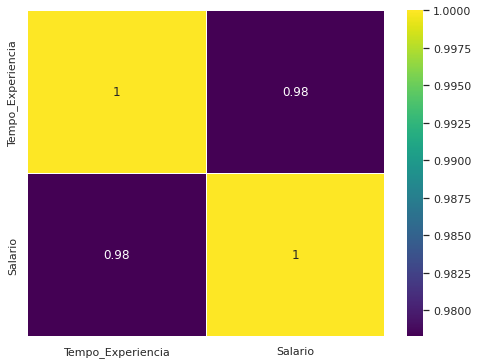

In [ ]:
# --- Analisando as correlações nos dados

# Função para analisar correlação
Correlacao = Base_Dados.corr() 

# Definindo Tamanho do Gráfico
plt.figure(figsize=(8,6)) 

# Fazendo o plot do gráfico
sns.heatmap(Correlacao, linewidths=.1, cmap='viridis', annot=True);

# Criação do Modelo usando SKlearn

In [ ]:
# Criando o Modelo

# Separando a base de dados
Variaveis_Caracteristica = Base_Dados[['Tempo_Experiencia']]
Variaveil_Prever = Base_Dados[['Salario']]

# Importando a função para separar os dados de Treino e Teste
from sklearn.model_selection import train_test_split

# Separando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split( Variaveis_Caracteristica, 
                                                        Variaveil_Prever, 
                                                        test_size=0.20, 
                                                        random_state=10 )

print('Dados de Treino: ', len(x_treino) )
print('Dados de Teste: ', len(x_teste) )

Dados de Treino:  24
Dados de Teste:  6


In [ ]:
# Importando função da Regressão
from sklearn.linear_model import LinearRegression

# Chamando a função e treinando o modelo
Funcao_Regressao_Linear = LinearRegression()
Funcao_Regressao_Linear.fit( x_treino, y_treino )

# extrair coeficientes
Declive = Funcao_Regressao_Linear.coef_
Interceptar = Funcao_Regressao_Linear.intercept_

# Fazendo a previsao dos de teste
Previsao = Funcao_Regressao_Linear.predict( x_teste )

print('Coeficientes')
print('Declive (b1): ', Declive[0][0] )
print('Interceptar (b0): ', Interceptar[0] )

Coeficientes
Declive (b1):  9356.862993539356
Interceptar (b0):  26089.09663241673


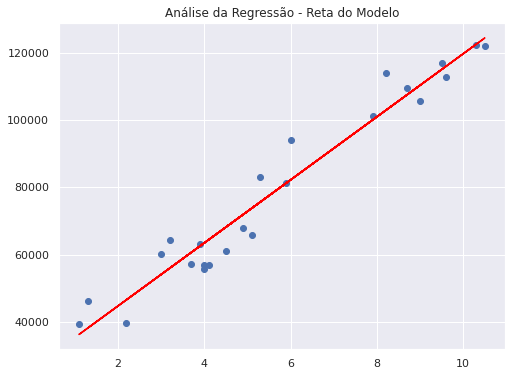

In [ ]:
# plotar pontos e retas com parâmetros otimizados
plt.figure(figsize=(8,6)) 
plt.scatter(x_treino, y_treino)
plt.plot(x_treino, (x_treino * Declive + Interceptar), color='red')
plt.title('Análise da Regressão - Reta do Modelo');

In [ ]:
Previsao

array([[89715.76498848],
       [56031.05821174],
       [53223.99931368],
       [40124.39112273],
       [44802.8226195 ],
       [92522.82388655]])


 Score do modelo (R²):  0.956809945183257

 RMSE 3128.1895944642365 



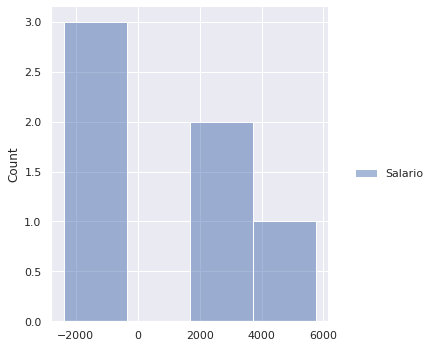

In [ ]:
# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = Funcao_Regressao_Linear.score( Variaveis_Caracteristica, Variaveil_Prever )

# Calculando o RMSE do modelo
RMSE = metrics.mean_squared_error( y_teste, Previsao, squared=False )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );

In [ ]:
# Reperformando os dados da Base
Reporformando = Funcao_Regressao_Linear.predict( Base_Dados[['Tempo_Experiencia']] )

# Incluindo a previsao em um Data Frame
Base_Reporformando = pd.DataFrame( Reporformando, columns=['Previsao do Modelo'] )

# Arredondando 2 casas decimais
Base_Reporformando['Previsao do Modelo'] = Base_Reporformando['Previsao do Modelo'].round(2)

# Verificando
Base_Reporformando.head()

,Previsao do Modelo
0,36381.65
1,38253.02
2,40124.39
3,44802.82
4,46674.20


In [ ]:
# Incluindo lado a lado para comparar
# Verificando os primeiros registros
pd.concat([Base_Dados, Base_Reporformando], axis=1).head(10)

,Tempo_Experiencia,Salario,Previsao do Modelo
0,1.1,39343.0,36381.65
1,1.3,46205.0,38253.02
2,1.5,37731.0,40124.39
3,2.0,43525.0,44802.82
4,2.2,39891.0,46674.20
5,2.9,56642.0,53224.00
6,3.0,60150.0,54159.69
7,3.2,54445.0,56031.06
8,3.2,64445.0,56031.06
9,3.7,57189.0,60709.49


In [ ]:
# Quero contratar uma pessoa com 15 anos de experiência
Anos_Experiencia = [[ 5 ]]
Nova_Precisao = round( Funcao_Regressao_Linear.predict( Anos_Experiencia )[0][0], 2)

print(f'O salário da pessoa será: R$ {Nova_Precisao}')

O salário da pessoa será: R$ 72873.41


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Criação do modelo usando Stats Models

In [ ]:
# Vamos verificar usando o StatsModel 

# Fundação da regressão
import statsmodels.api as sm

# Aplicando a regressão nos Dados
Funcao_Regressao_Linear_Stats_Model = sm.OLS(x_treino, y_treino).fit()

# Extraindo os dados de metricas do modelo
Dados_Modelo = Funcao_Regressao_Linear_Stats_Model.summary()

# Verificando
print(Dados_Modelo);

                                 OLS Regression Results                                
Dep. Variable:      Tempo_Experiencia   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              914.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    5.04e-20
Time:                        18:55:15   Log-Likelihood:                         -33.813
No. Observations:                  24   AIC:                                      69.63
Df Residuals:                      23   BIC:                                      70.80
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

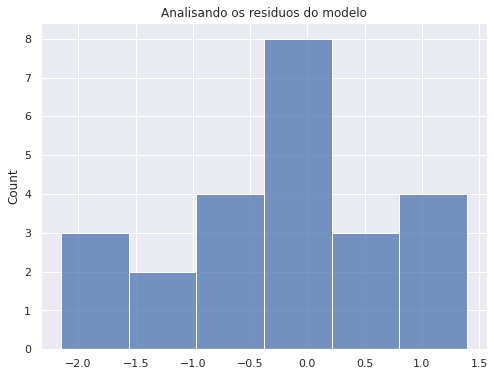

In [ ]:
# Analisando os residuos do modelo
plt.figure(figsize=(8,6)) 
plt.title('Analisando os residuos do modelo')
sns.histplot(Funcao_Regressao_Linear_Stats_Model.resid);

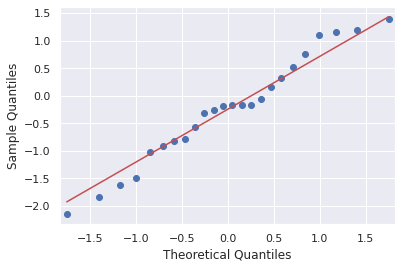

In [ ]:
# Analisandoa reta da regressão
sm.qqplot(Funcao_Regressao_Linear_Stats_Model.resid, line='s');

In [ ]:
Funcao_Regressao_Linear_Stats_Model.predict( Base_Dados[['Tempo_Experiencia']] )

0     0.000082
1     0.000097
2     0.000112
3     0.000149
4     0.000164
5     0.000217
6     0.000224
7     0.000239
8     0.000239
9     0.000276
10    0.000291
11    0.000299
12    0.000299
13    0.000306
14    0.000336
15    0.000366
16    0.000381
17    0.000396
18    0.000441
19    0.000448
20    0.000508
21    0.000531
22    0.000590
23    0.000613
24    0.000650
25    0.000673
26    0.000710
27    0.000717
28    0.000770
29    0.000785
dtype: float64